In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functions as fc
import importlib

importlib.reload(fc)

C:\Users\Sabrina\AppData\Local\Temp\ipykernel_41396\2591684422.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<module 'functions' from 'c:\\Users\\Sabrina\\Desktop\\TestDA\\Week_9\\Final_project\\notebooks\\functions.py'>

In [2]:
cleaned_video_games = pd.read_csv('..\data\cleaned\cleaned_video_games_df.csv')
cleaned_video_games

,Unnamed: 0,game_title,platform,year,genre,publisher,north_america,europe,japan,rest_of_world,global,review
0,0,Wii Sports,Wii,2006,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,Lizzie McGuire 2: Lizzie Diaries,GBA,2004,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,Xenoblade Chronicles,Wii,2010,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,SingStar Abba,PS3,2008,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,FIFA Soccer World Championship,PS2,2000,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [3]:
japan_df = cleaned_video_games.copy().drop(columns=['north_america', 'europe', 'rest_of_world','global', 'Unnamed: 0'], axis=1)
display(japan_df.head(3))

,game_title,platform,year,genre,publisher,japan,review
0,Wii Sports,Wii,2006,Sports,Nintendo,3.77,76.28
1,Super Mario Bros.,NES,1985,Platform,Nintendo,6.81,91.00
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,3.63,82.07


In [4]:
japan_df_platform_sales = fc.df_grouping(japan_df, 'platform', 'japan')
japan_df_genre_sales = fc.df_grouping(japan_df, 'genre', 'japan')
japan_df_publisher_sales = fc.df_grouping(japan_df, 'publisher', 'japan')

display(japan_df_platform_sales.head(3))
display(japan_df_genre_sales.head(3))
display(japan_df_publisher_sales.head(3))

,year,platform,japan
0,2006,DS,26.71
1,2005,DS,25.11
2,2009,DS,16.73


,year,genre,japan
0,2009,Role-Playing,14.64
1,1999,Role-Playing,13.63
2,2006,Role-Playing,12.83


,year,publisher,japan
0,2006,Nintendo,30.05
1,2009,Nintendo,26.58
2,2005,Nintendo,26.35


## Japan Platform Analysis

In [5]:
#for a better readability in the lineplot, I'll be separating platforms by companies. 

sony_platform_df = japan_df_platform_sales.copy()
sony_platform_df = sony_platform_df[sony_platform_df['platform'].isin(['PS2', 'PS', 'PS3', 'PSP', 'PSV'])]


nintendo_platform_df = japan_df_platform_sales.copy()
nintendo_platform_df = nintendo_platform_df[nintendo_platform_df['platform'].isin(['NES', 'GB', 'SNES', 'N64', 'GBA', 'GC', 'DS', '3DS', 'Wii','WiiU'])]


sega_platforms_df = japan_df_platform_sales.copy()
sega_platforms_df = sega_platforms_df[sega_platforms_df['platform'].isin(['GEN', 'SCD', 'SAT', 'DC'])]


microsoft_platforms_df = japan_df_platform_sales.copy()
microsoft_platforms_df = microsoft_platforms_df[microsoft_platforms_df['platform'].isin(['XB', 'X360'])]

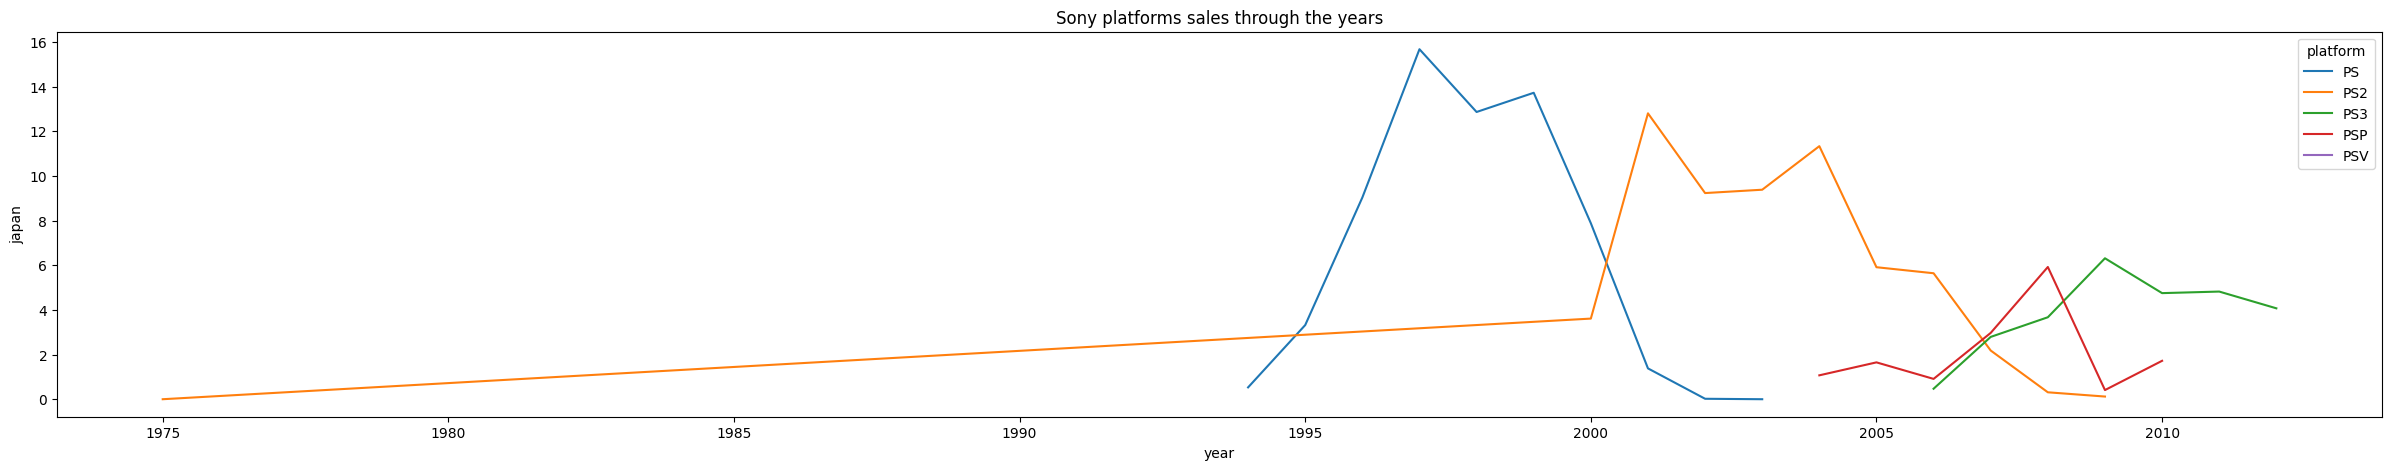

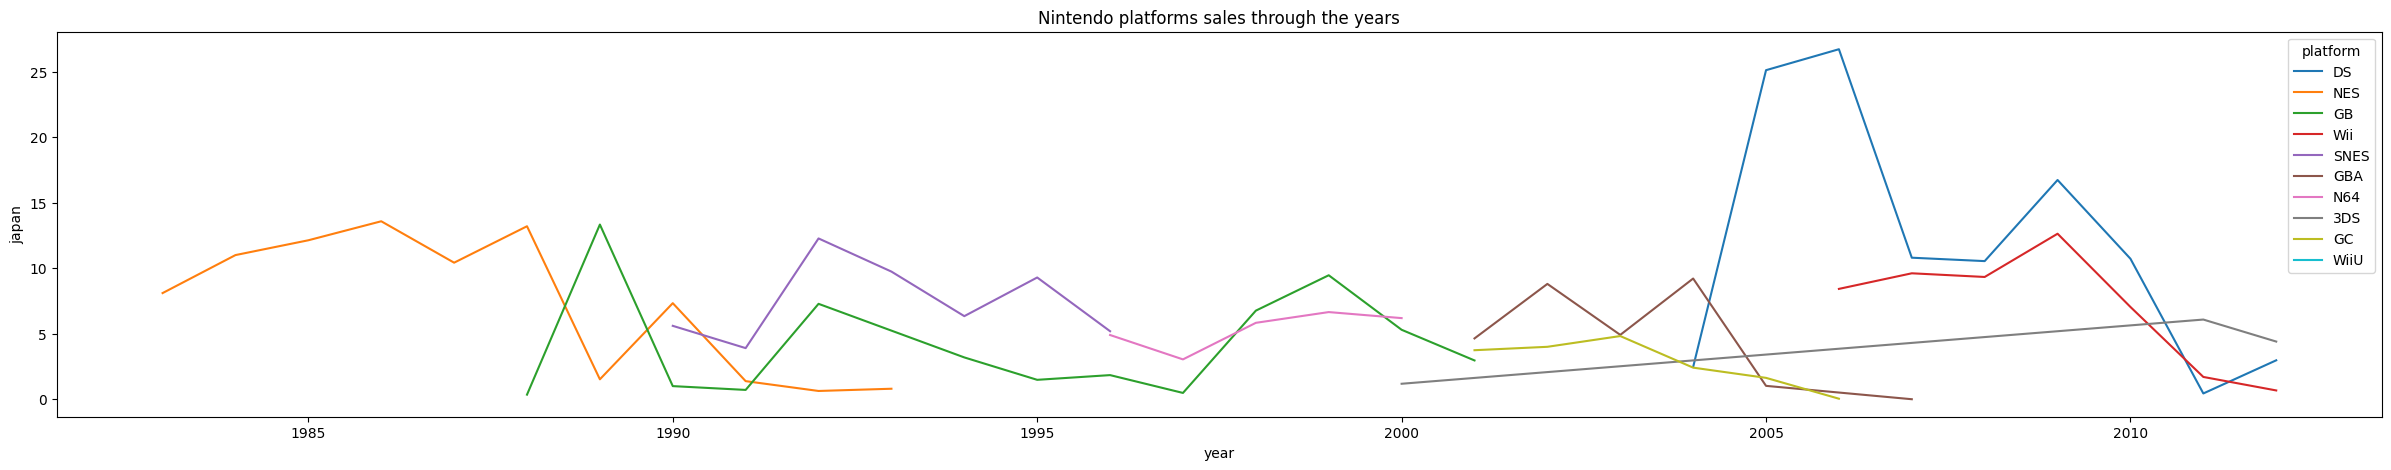

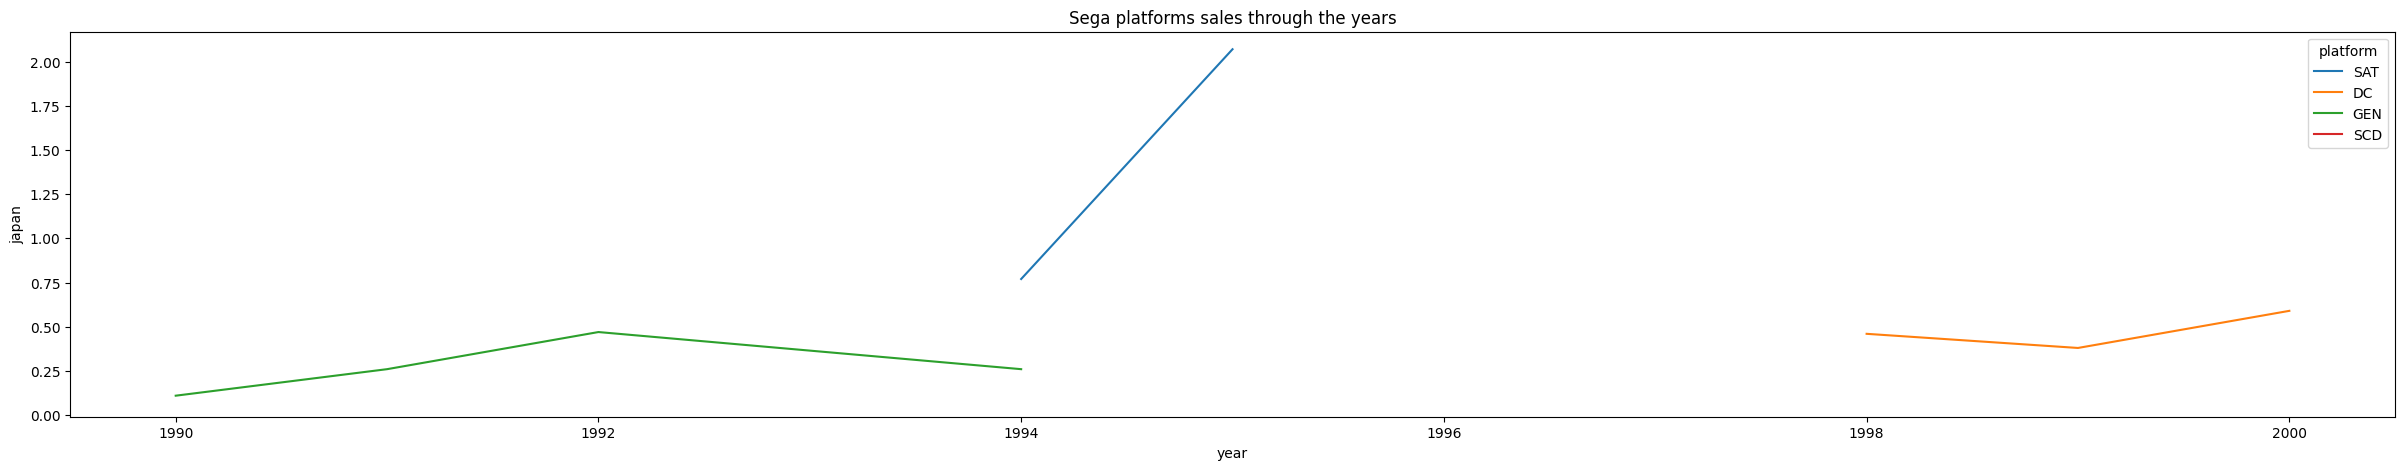

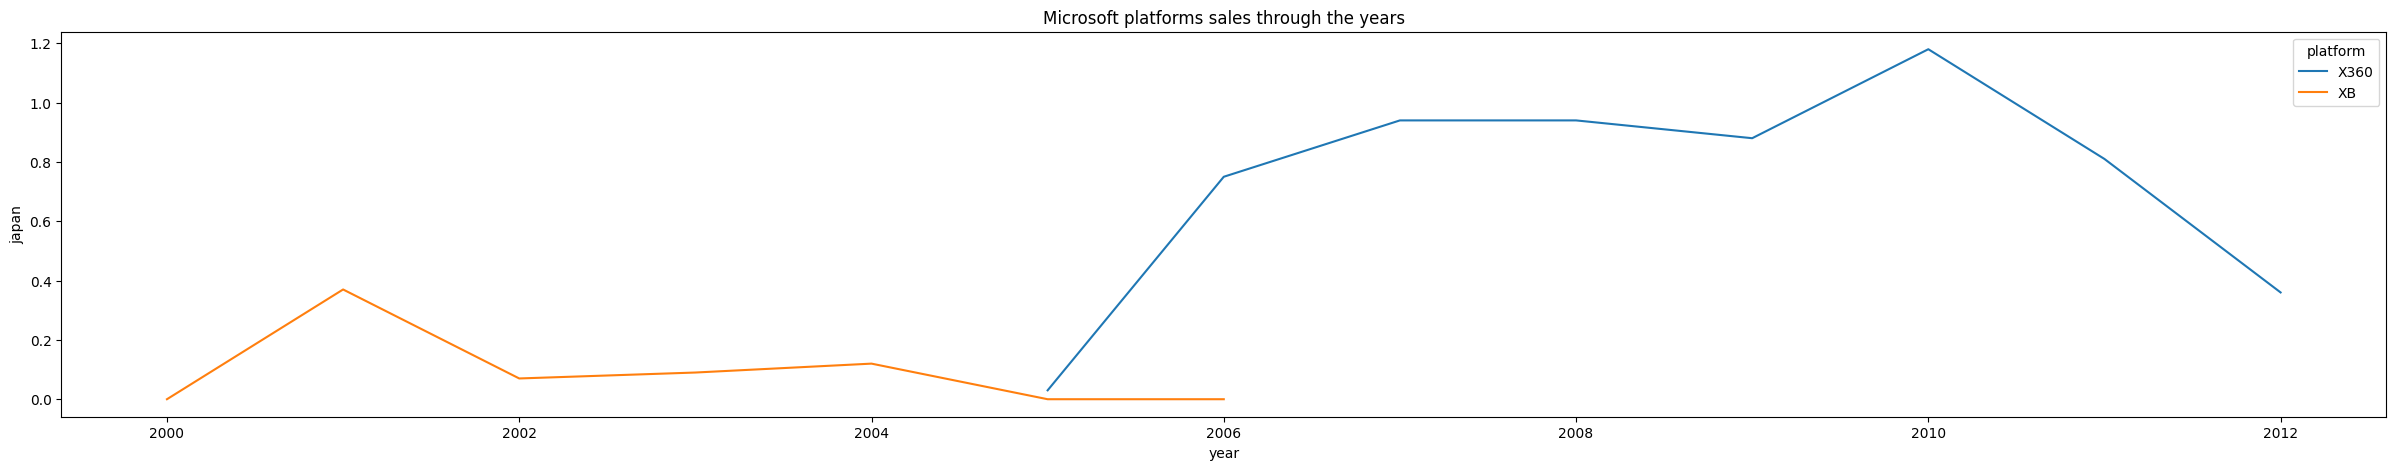

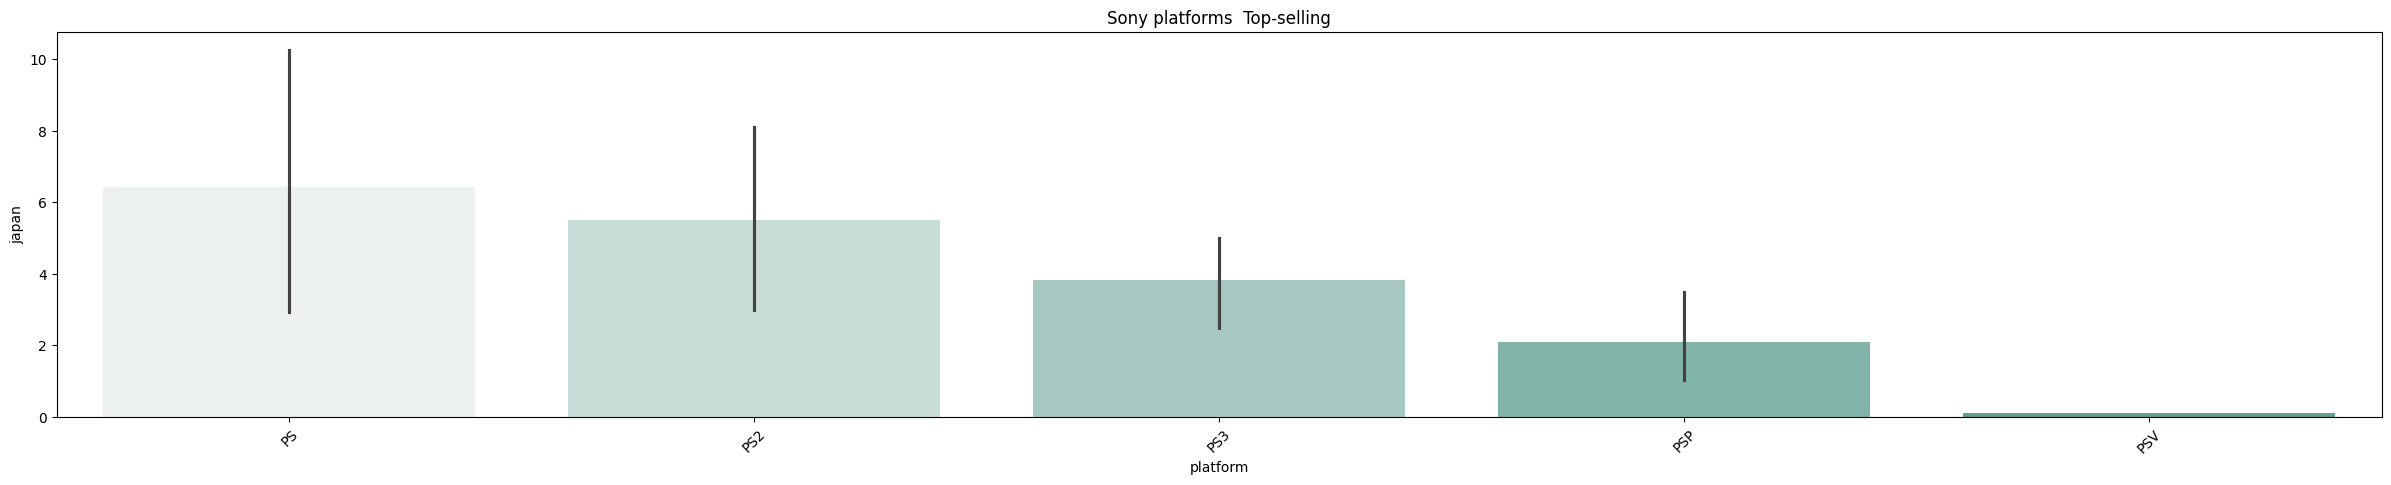

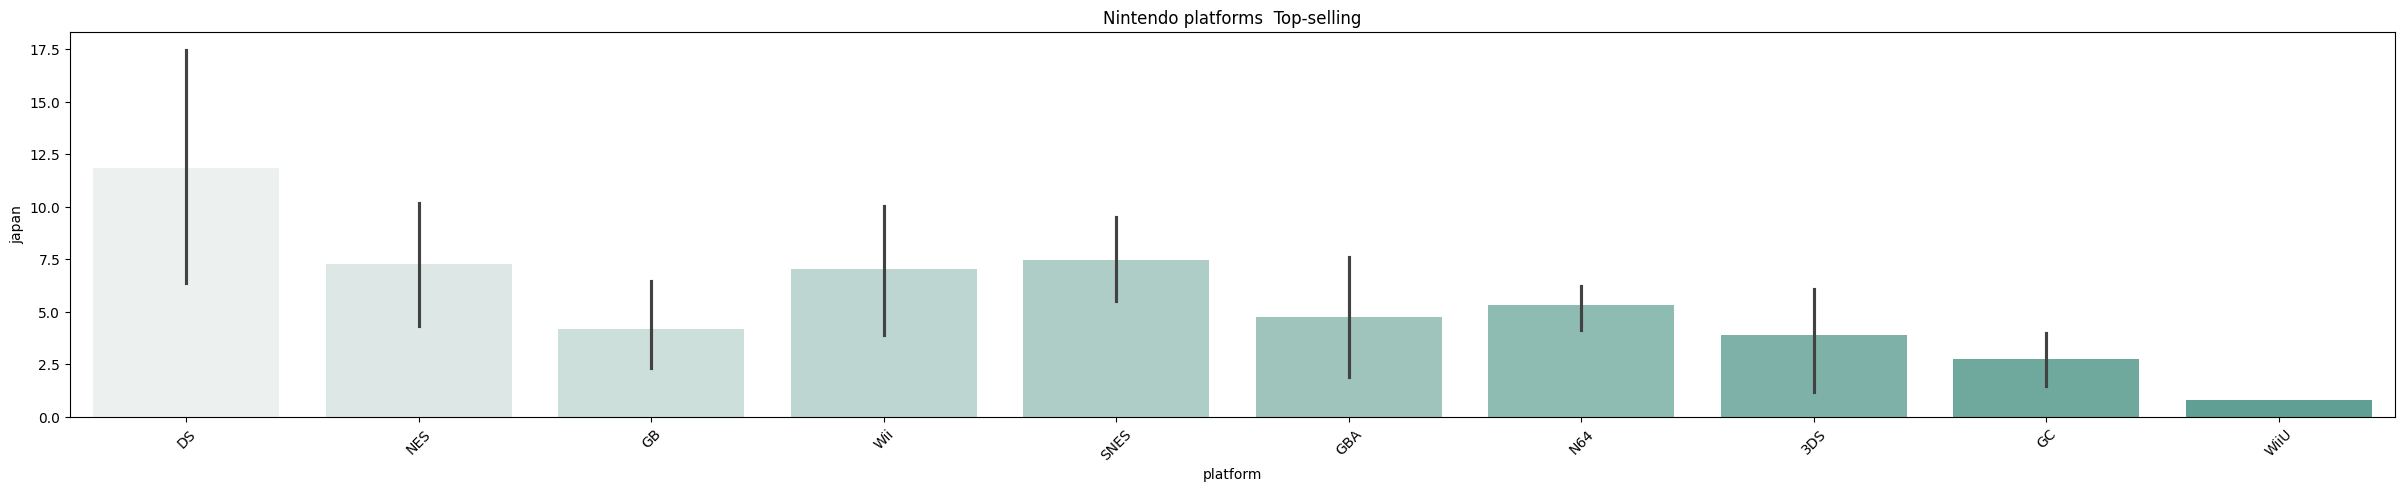

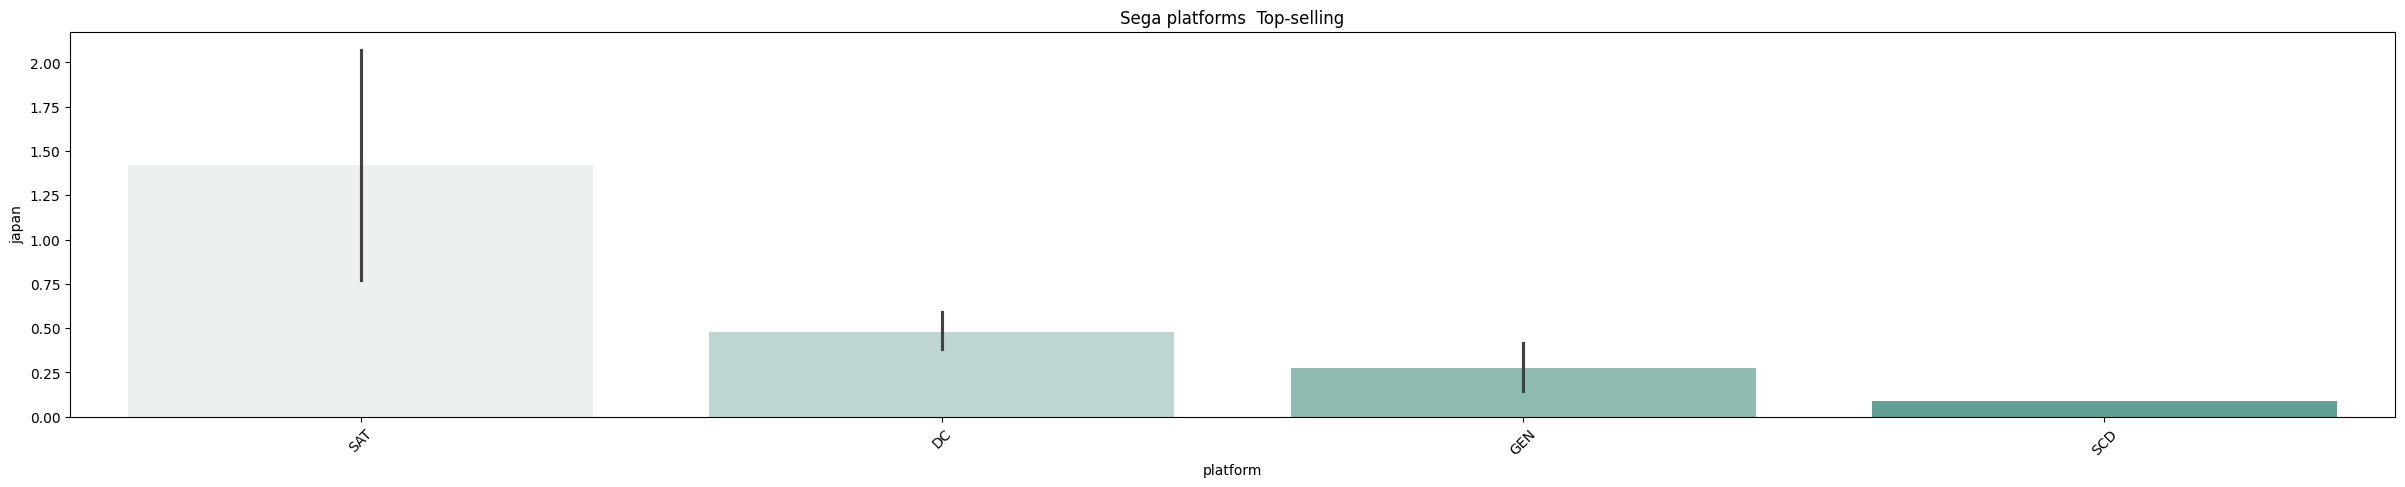

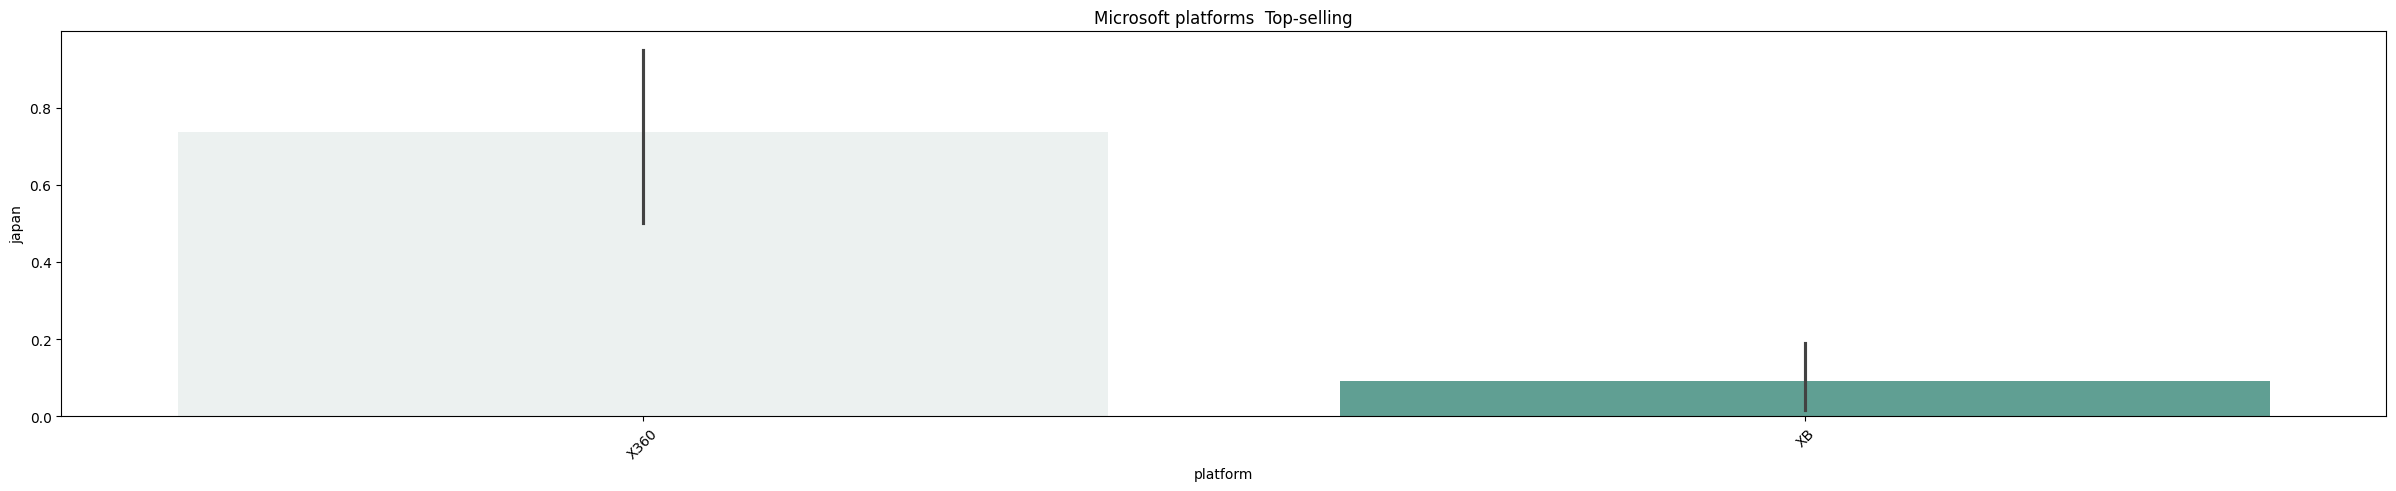

In [6]:
japan_platform_list = [sony_platform_df, nintendo_platform_df, sega_platforms_df, microsoft_platforms_df]
japan_platform_names = ['Sony platforms', 'Nintendo platforms', 'Sega platforms', 'Microsoft platforms']

fc.lineplot(japan_platform_list, japan_platform_names, objective = 'platform', y = 'japan')
fc.barplot(japan_platform_list, japan_platform_names, objective = 'platform', y = 'japan')

In [7]:
japan_df_platform_sales['japan'].describe().round(3)

count    148.000
mean       4.091
std        4.993
min        0.000
25%        0.298
50%        1.710
75%        6.418
max       26.710
Name: japan, dtype: float64

## Japan Genre Analysis

In [8]:
japan_df_genre_sales['genre'].unique()

array(['Role-Playing', 'Misc', 'Platform', 'Simulation', 'Sports',
       'Puzzle', 'Fighting', 'Action', 'Strategy', 'Racing', 'Adventure',
       'Shooter'], dtype=object)

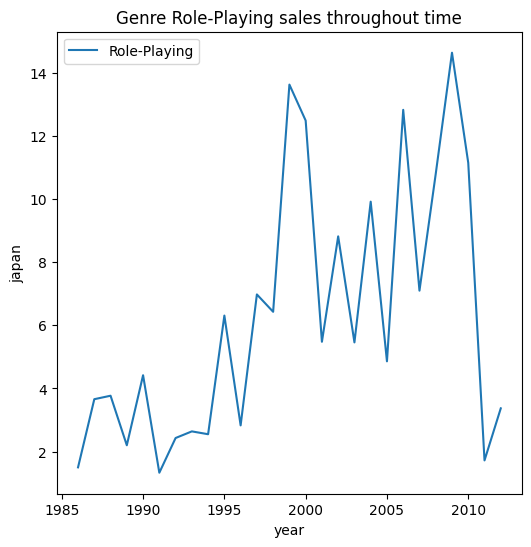

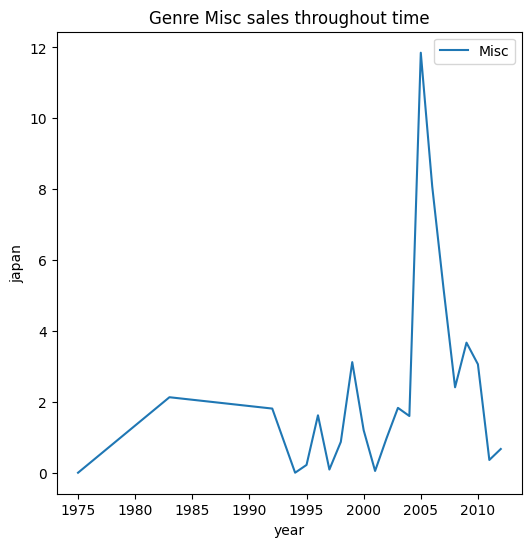

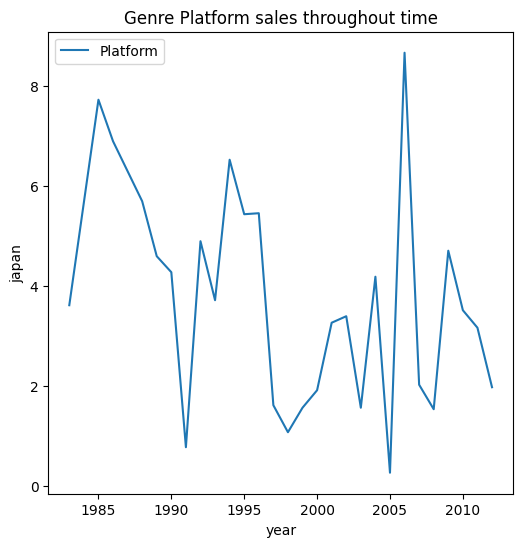

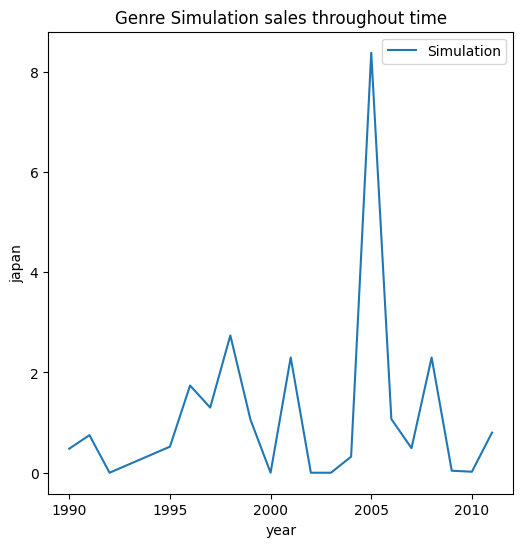

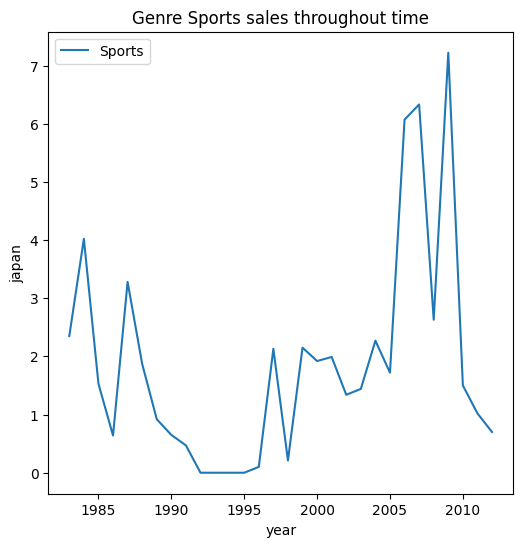

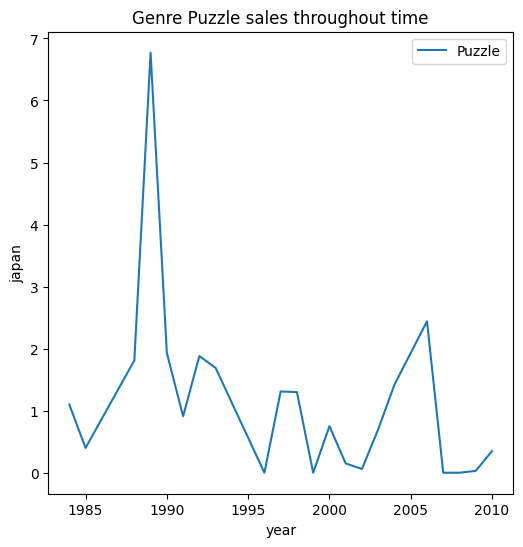

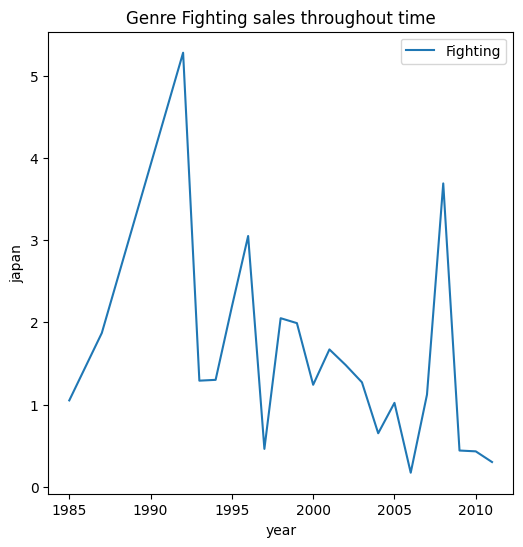

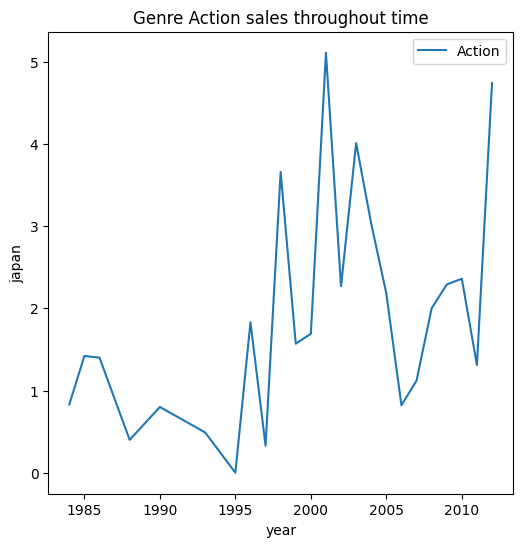

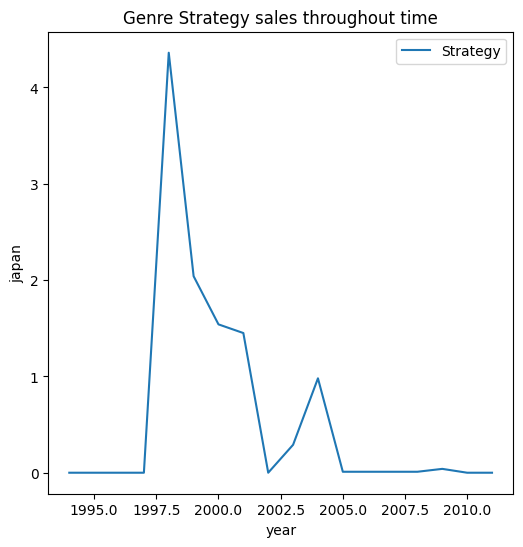

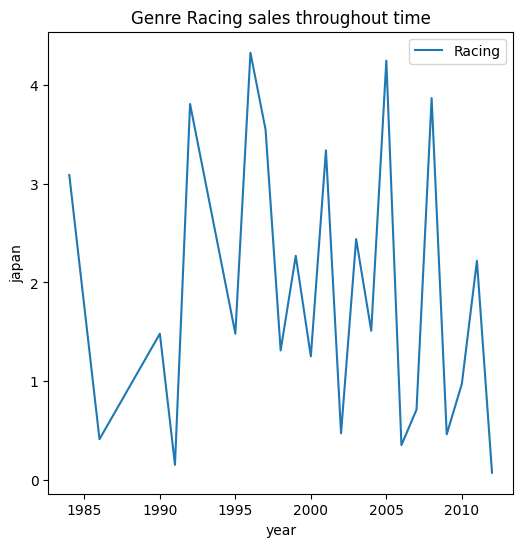

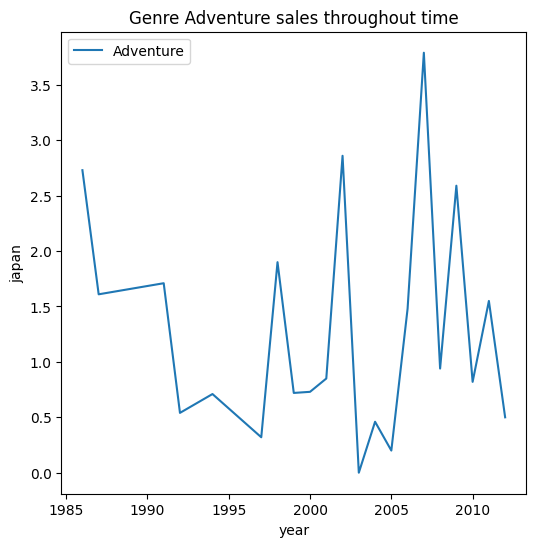

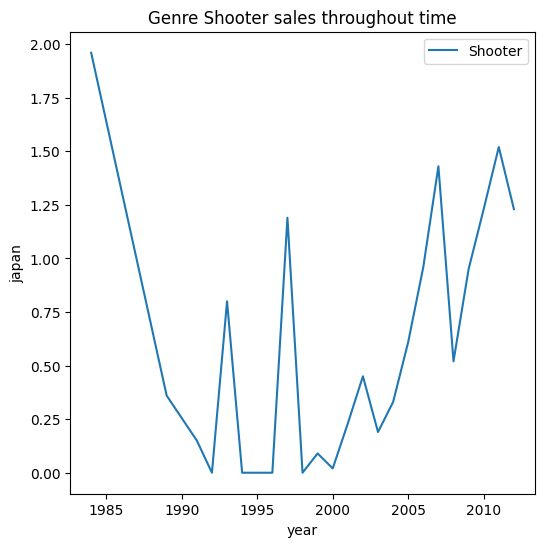

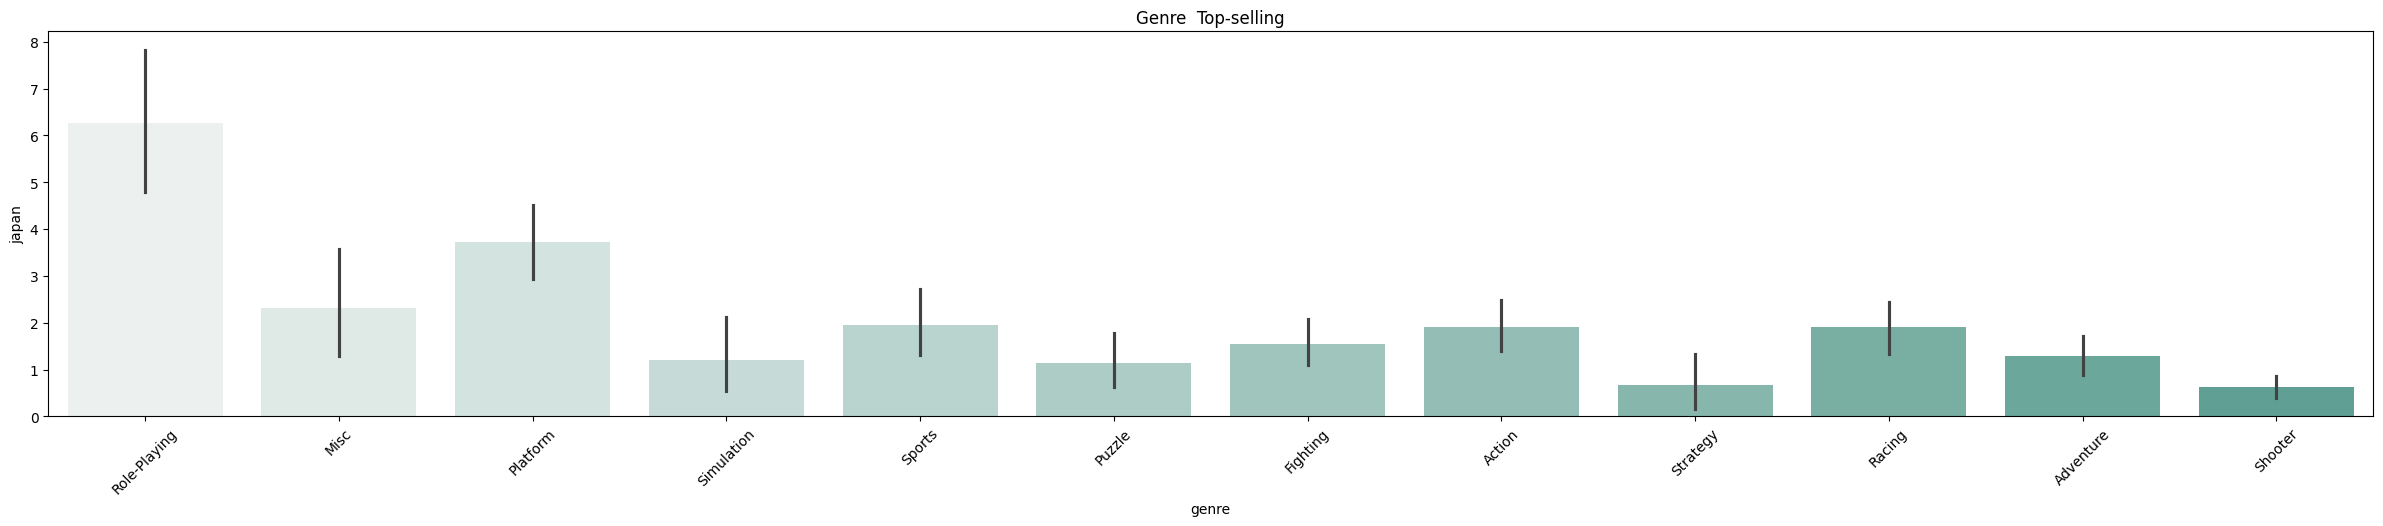

In [9]:
for genre in japan_df_genre_sales['genre'].unique():
    plt.figure(figsize=(6, 6))
    sns.lineplot(data = japan_df_genre_sales[japan_df_genre_sales['genre'] == genre], x = 'year', y = 'japan', label=genre)
    plt.title(f'Genre {genre} sales throughout time')
    plt.show()

fc.barplot([japan_df_genre_sales], ['Genre'], objective = 'genre', y = 'japan')

In [10]:
japan_df_genre_sales['japan'].describe().round(3)

count    277.000
mean       2.186
std        2.556
min        0.000
25%        0.470
50%        1.480
75%        2.740
max       14.640
Name: japan, dtype: float64

## Japan Publisher Analysis

In [11]:
major_publisher_df = japan_df_publisher_sales.copy()
major_publisher_df = major_publisher_df[major_publisher_df['publisher'].isin(['Nintendo', 'Electronic Arts', 'Activision', 'Microsoft Game Studios', 'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive', 'Konami Digital Entertainment', 'Bethesda Softworks', 'THQ', 'Sega', 'Capcom', 'Square Enix', 'Namco Bandai Games', 'Warner Bros. Interactive Entertainment'])]


indie_publisher_df = japan_df_publisher_sales.copy()
indie_publisher_df = indie_publisher_df[indie_publisher_df['publisher'].isin(['505 Games', 'Deep Silver', 'Level 5', 'D3Publisher', 'Global Star', 'Hudson Soft', 'Majesco Entertainment', 'Crave Entertainment', 'Valve Software', 'City Interactive', 'Sammy Corporation', 'Koch Media', 'Play It', 'GSP', 'Russel', 'Success', 'Tomy Corporation'])]

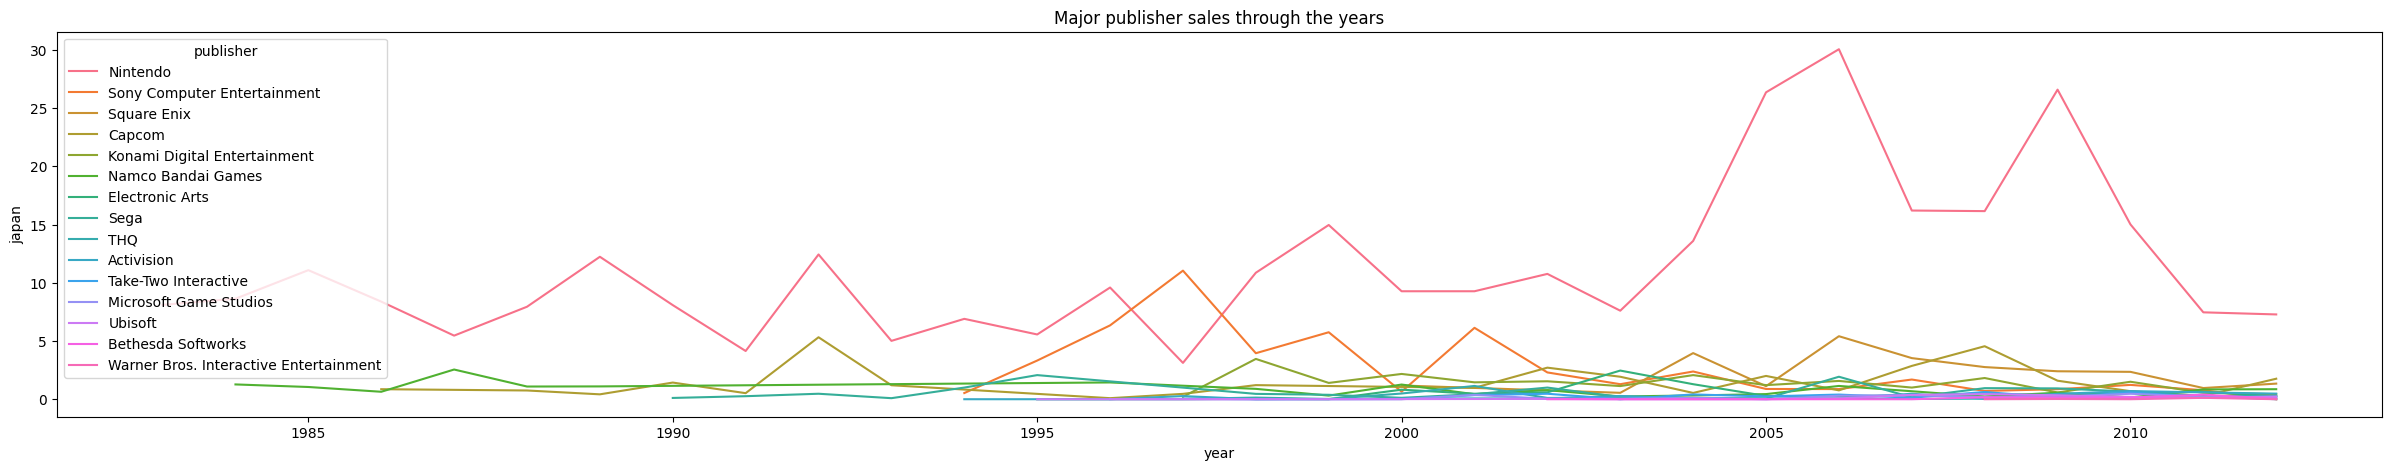

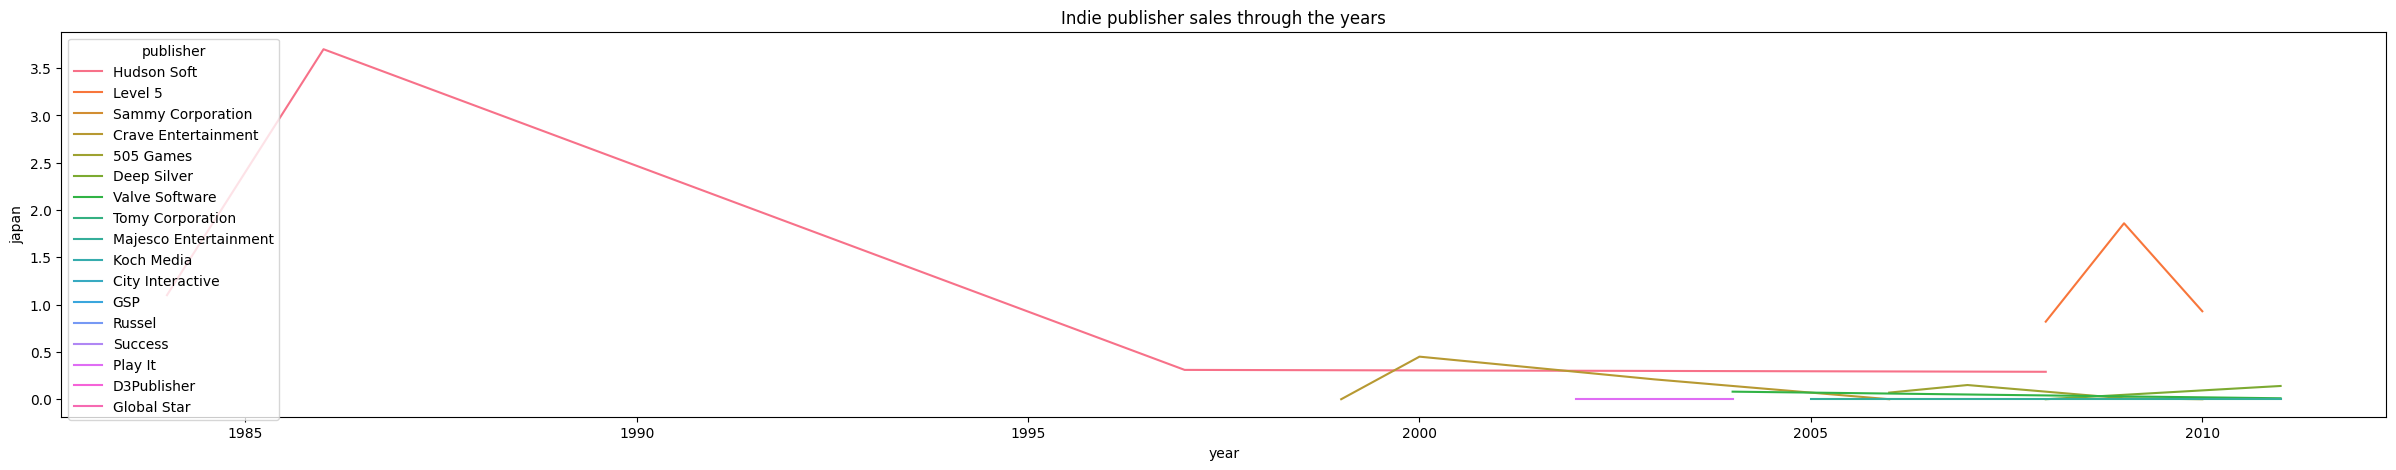

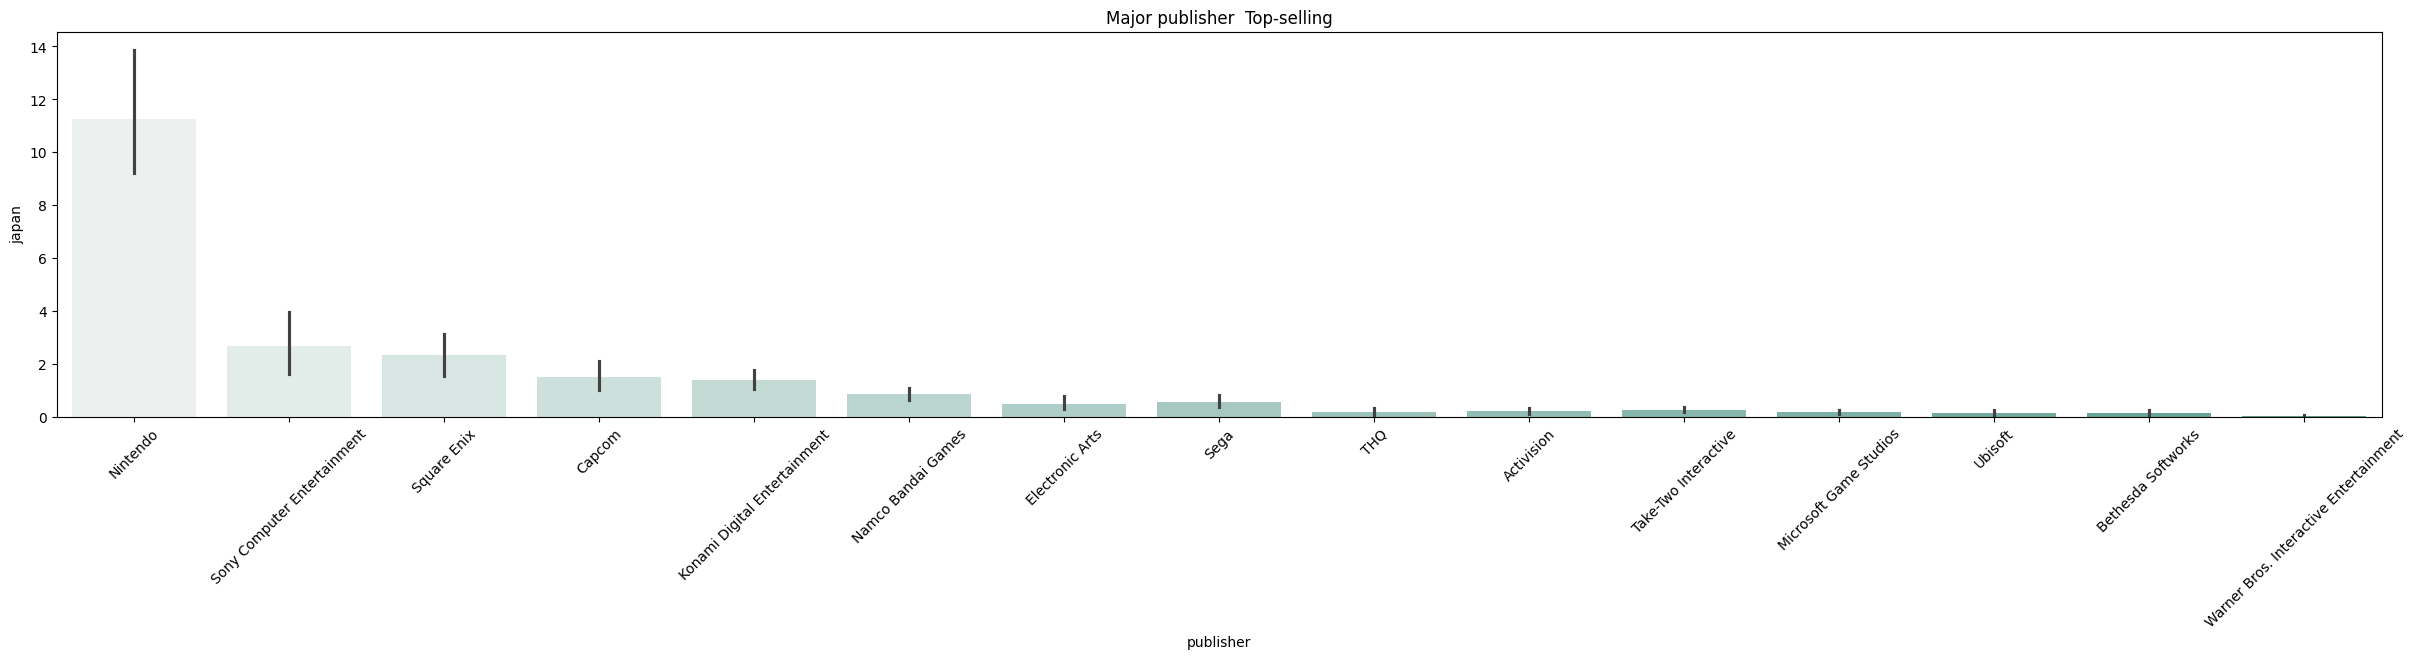

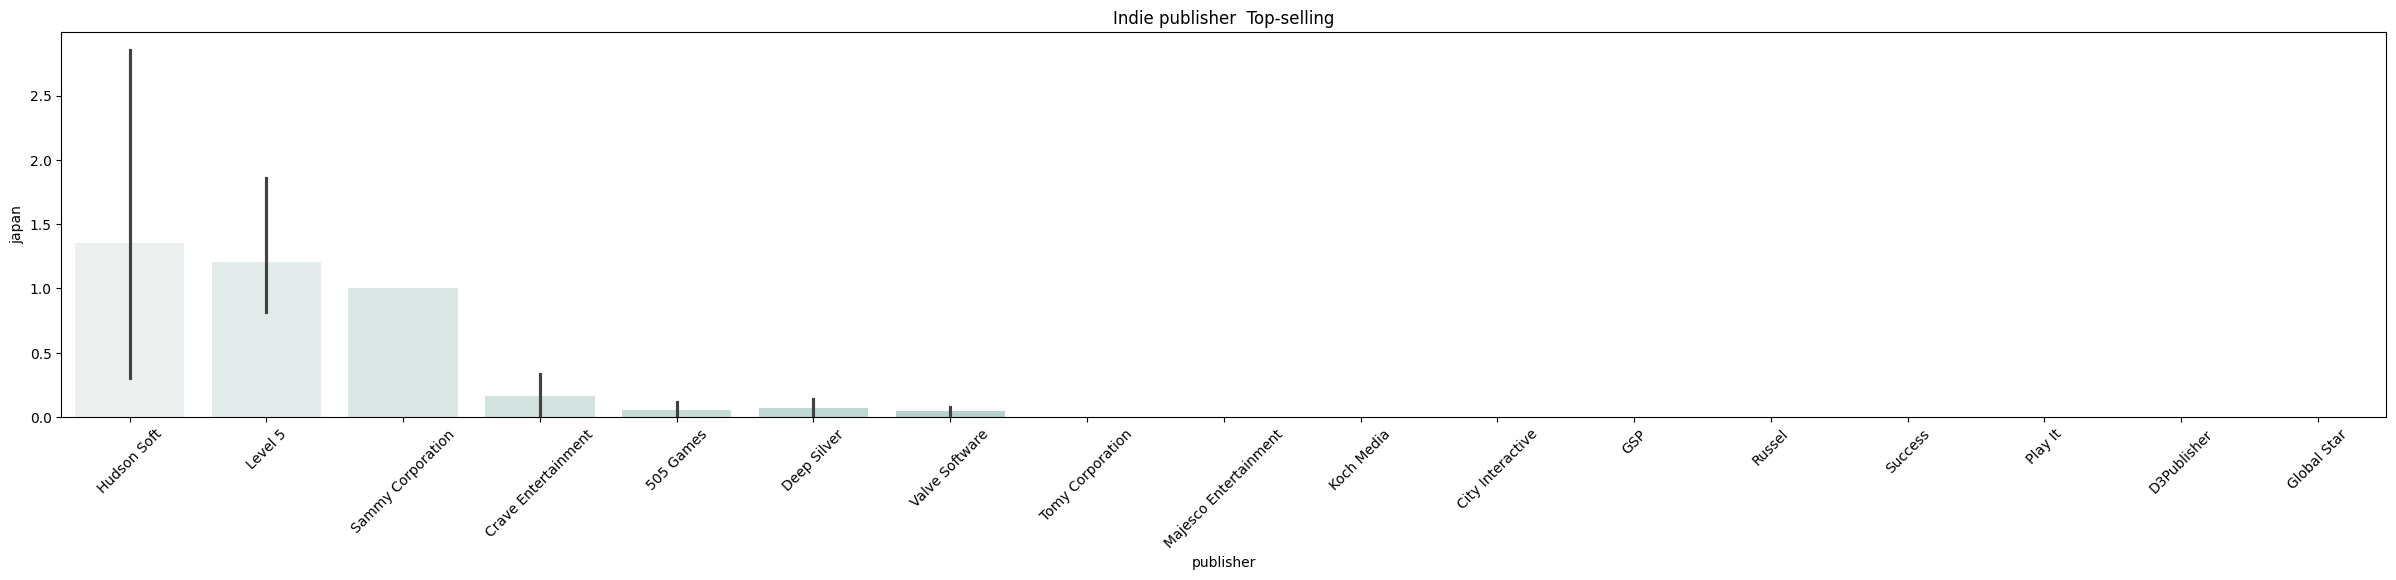

In [12]:
publisher_df_list = [major_publisher_df, indie_publisher_df]
publisher_names = ['Major publisher', 'Indie publisher']

fc.lineplot(publisher_df_list, publisher_names, objective = 'publisher', y = 'japan')
fc.barplot(publisher_df_list, publisher_names, objective = 'publisher', y = 'japan')

In [13]:
japan_df_publisher_sales['japan'].describe().round(3)

count    458.000
mean       1.322
std        3.301
min        0.000
25%        0.000
50%        0.165
75%        1.045
max       30.050
Name: japan, dtype: float64